<h2>1.论文总结</h2>
5'UTR是mRNA上的一个重要区域，它在调控基因表达和蛋白质合成中起着关键作用。5'UTR中的变体可能会影响翻译效率，进而影响蛋白质的表达水平，与许多疾病的发生发展有关。核糖体装载的效率可以作为衡量翻译效率的一个指标，即平均核糖体负载（mean ribosome load, MRL），它表示与特定mRNA序列结合的平均核糖体数量。文章通过开放新的大规模平行翻译测定实验MPRA，结合多聚体分析和RNA测序，构建280，000个5’UTR序列文库，利用翻译数据搭建了一个深度学习CNN模型进行学习，根据序列预测核糖体装载（ribosome loading），进而推测翻译效率并研究SNV等变体的影响。

**Optimus 5-Prime 模型搭建**：对5'-UTR序列用one-hot编码作为模型输入，然后用tensorflow和keras搭建CNN包括3个卷积层和1个全连接层，最后一个线性的输出预测MRL。计算UTR的最小自由能MFE来表征二级结构影响。10折交叉验证网格搜索确定模型最优超参数。第一卷积层：120 filters（8x4），ReLU激活，0 dropout。第二卷积层：120 filters（8x1），ReLU激活，0 dropout。第三卷积层：120 filters（8x1），ReLU激活，0 dropout。Dense layer：40 节点，20% dropout，用于信息融合和减少过拟合。输出层：一个线性输出。对于280，000个5'UTR中260，000用于模型训练，其余用作模型测试。模型可以解释93%的测试集的变体。并用非随机的富含poly(U), poly(C), poly(A) and poly(G)的文库数据retrain以提升模型性能。然后增大模型输入层的宽度，对于长的5'-UTR序列进行retrain。      
**polysome profile model**：用类似的模型结构搭建了一个模型用于预测给定序列的完整多聚体分布，采用14个线性输出表示多聚体比例。
第一卷积层：120 filters（8x4），ReLU激活，0 dropout。第二卷积层：120 filters（8x1），ReLU激活，0 dropout。第三卷积层：120 filters（8x1），ReLU激活，0 dropout。Dense layer：80 节点，10% dropout，用于信息融合和减少过拟合。输出层：14个线性输出        
**k-mer线性模型**：利用UTR序列中的位置特定k-mers作为特征，通过线性回归训练1mer-6mer，并使用正则化和5折交叉验证来优化模型性能和泛化能力       
**遗传算法设计新序列**：使用与构建CNN相同的训练和测试集，在设定的迭代次数中，随机选择一个或两个碱基（有50%的概率选择两个）进行变异，然后使用模型评估其适应度。如果新序列的评分更高或更接近目标MRL（核糖体负载的平均值），则接受新序列；否则，选择未改变的序列。
 


<h2>2.使用LSTM模型基于序列特征预测核糖体</h2>



**模型简介**：在pytorch框架下使用长短期记忆网络 (Long Short-Term Memory, LSTM) 实现基于 DNA 序列数据预测某种核糖体的特征的模型。使用DataLoader类创建训练、验证和测试数据加载器，它们可以批量加载数据，并在训练时对数据进行洗牌。从csv文件中读取数据后将 DNA 序列中的碱基（A、C、G、T）进行 one-hot 编码，转换为数值向量表示。LSTM模型部分包含一个LSTM层和一个全连接层（fc）。LSTM层用于处理输入序列，捕捉序列中的时序依赖关系。全连接层（fc）将LSTM层的输出映射到最终的预测输出。初始化模型、损失函数、优化器，并设置训练轮数（num_epochs）和学习率（learning_rate）。训练后使用R平方和RMSE两个指标评估模型

In [1]:
!pip3 install torch

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 14.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 11.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
!pip install scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 1.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 59.2 MB/s eta 0:00:00


In [3]:
!pip3 install matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 7.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 210.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 74.4 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 82.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 0:00:00ta 0:00:01


In [4]:
#导入包
import os
import numpy as np
import pandas as pd
import glob
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
class SequenceDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, index):
        sequence = self.sequences[index]
        label = self.labels[index]
        return torch.tensor(sequence, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)


In [6]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [7]:
def one_hot_encode_sequence(seq):
    mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    encoded_seq = np.zeros((len(seq), 4))
    for i, nucleotide in enumerate(seq):
        encoded_seq[i, mapping[nucleotide]] = 1
    return encoded_seq

In [8]:
def load_data(file_path):
    sequences = []
    labels = []
    with open(file_path, 'r') as f:
        next(f)  # Skip header
        for line in f:
            seq, label = line.strip().split('\t')
            sequences.append(one_hot_encode_sequence(seq))
            labels.append(float(label))
    return np.array(sequences), np.array(labels)

In [10]:
def load_data(file_path):
    df = pd.read_csv(file_path, delimiter=',')  # 读取 CSV 文件
    sequences = df['seq'].apply(one_hot_encode_sequence).tolist()
    labels = df['label'].values.astype(float)
    return np.array(sequences), np.array(labels)

In [11]:
train_sequences, train_labels = load_data('/personal/作业/data/train.csv')
test_sequences, test_labels = load_data('/personal/作业/data/test.csv')
# Split the training data into training and validation sets
train_sequences, val_sequences, train_labels, val_labels = train_test_split(train_sequences, train_labels, test_size=0.2, random_state=42)

In [12]:
train_dataset = SequenceDataset(train_sequences, train_labels)
val_dataset = SequenceDataset(val_sequences, val_labels)
test_dataset = SequenceDataset(test_sequences, test_labels)

In [13]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [52]:
input_dim = 4  # 序列中不同碱基种类
hidden_dim = 128
num_layers = 2
output_dim = 1
num_epochs = 13
learning_rate = 0.001

In [53]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
device

'cpu'

In [54]:
def train(model, train_loader, val_loader,criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        for sequences, labels in train_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            
            outputs = model(sequences)
            loss = criterion(outputs.squeeze(), labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_train_loss += loss.item()
        
        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        # Validation step
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for sequences, labels in val_loader:
                sequences, labels = sequences.to(device), labels.to(device)
                outputs = model(sequences)
                loss = criterion(outputs.squeeze(), labels)
                running_val_loss += loss.item()

        avg_val_loss = running_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
    return train_losses, val_losses

In [55]:
def evaluate(model, test_loader, criterion):
    model.eval()
    actuals = []
    predictions = []
    total_loss = 0.0
    with torch.no_grad():
        for sequences, labels in test_loader:
            sequences, labels = sequences.to(device), labels.to(device)
            outputs = model(sequences)
            loss = criterion(outputs.squeeze(), labels)
            total_loss += loss.item()
            actuals.extend(labels.cpu().numpy())
            predictions.extend(outputs.squeeze().cpu().numpy())
    avg_loss = total_loss / len(test_loader)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    r2 = r2_score(actuals, predictions)
    print(f'Test Loss: {avg_loss:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}')
    return avg_loss, rmse, r2, actuals, predictions

In [56]:
train_losses, val_losses = train(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch [1/13], Train Loss: 0.6177, Val Loss: 0.4030
Epoch [2/13], Train Loss: 0.2449, Val Loss: 0.1771
Epoch [3/13], Train Loss: 0.4277, Val Loss: 0.2300
Epoch [4/13], Train Loss: 0.1875, Val Loss: 0.1445
Epoch [5/13], Train Loss: 0.1379, Val Loss: 0.1274
Epoch [6/13], Train Loss: 0.1535, Val Loss: 0.1439
Epoch [7/13], Train Loss: 0.1412, Val Loss: 0.1254
Epoch [8/13], Train Loss: 0.1360, Val Loss: 0.1202
Epoch [9/13], Train Loss: 0.1431, Val Loss: 0.1395
Epoch [10/13], Train Loss: 0.1249, Val Loss: 0.1146
Epoch [11/13], Train Loss: 0.1141, Val Loss: 0.1137
Epoch [12/13], Train Loss: 0.1092, Val Loss: 0.1071
Epoch [13/13], Train Loss: 0.1054, Val Loss: 0.1067


<h2>3.评估模型</h2>

In [57]:
avg_loss, rmse, r2, actuals, predictions = evaluate(model, test_loader, criterion)

Test Loss: 0.3098, RMSE: 0.5566, R^2: 0.6902


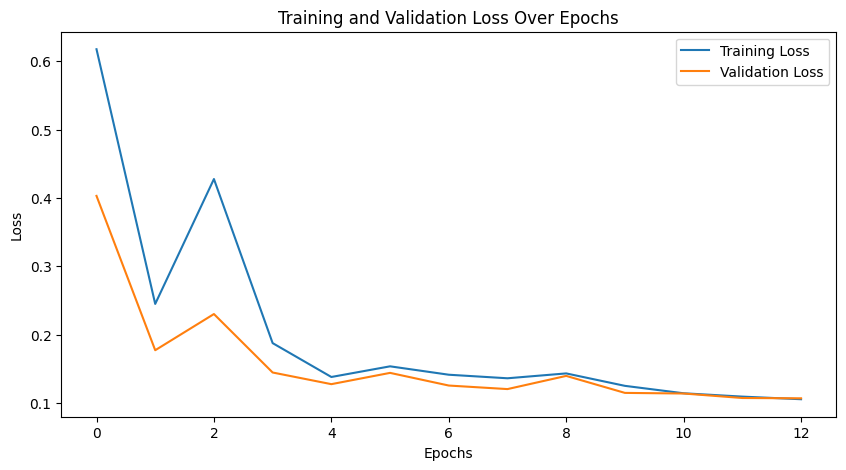

In [58]:
# 画损失曲线
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

虽然初始阶段存在波动，但最终training loss和validation loss都一起下降到较低的水平，并且validation loss与training loss差距不大，说明模型没有过拟合

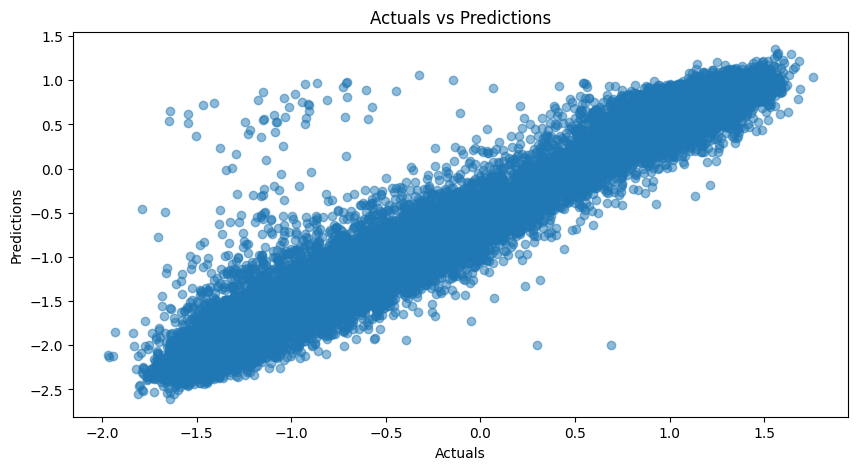

In [59]:
# 画预测值和实际值对比图
plt.figure(figsize=(10, 5))
plt.scatter(actuals, predictions, alpha=0.5)
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('Actuals vs Predictions')
plt.show()

真实值和预测值大部分分布集中在对角线附近，说明模型的预测效果较好。其中对于真实值大于0的部分，模型的预测准确度较好，但是对于真实值小于0的部分，模型有很多错误预测成大于0的数值，可能由于训练数据本身分布不均，导致模型没有很好的捕捉这部分数据特征，这方面仍然有待改进

In [60]:
# 打印 RMSE 和 R²
print(f'Final RMSE: {rmse:.4f}')
print(f'Final R^2: {r2:.4f}')

Final RMSE: 0.5566
Final R^2: 0.6902


使用R方（R²）和均方根误差（RMSE）来评估PyTorch框架搭建和训练的LSTM模型，这两个指标能够全面反映模型对5′UTR序列核糖体负载预测的准确性和有效性。R方衡量的是模型预测值与实际值之间的相关程度，其值越接近1，表示模型解释变量的能力越强，预测的准确性越高。而RMSE衡量的是模型预测值与实际值之间差异的标准度，其值越小，表示模型的预测误差越小，预测结果越精确。      
模型在test set上的R平方为0.69，表明模型能够解释约69%的输出变量的变异性，这是一个相对较高的值，意味着模型与数据拟合得较好，能够捕捉到数据中的主要趋势和模式。RMSE均方根误差为0.5566，表明模型预测的误差相对较小，但仍有改进空间。综合来看，模型在测试集上的表现是中等偏上的，能够很好的预测核糖体负载。